In [1]:
import os
os.environ["CUDA_VISIBLE_DEVICES"]="0"
import pandas as pd
from sklearn.manifold import TSNE
import plotly.express as px
from sklearn.preprocessing import LabelEncoder
from matplotlib.ticker import PercentFormatter
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import itertools
from sklearn.metrics import roc_curve, auc

In [2]:
from helpful_functions import generate_data, encode_columns, plot_corr, distance_beetween_two_matrix, tsne_visualization, evaluate

/home/datalab/miniconda3/envs/sergei_chirkov/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Prepare data: Adult

In [3]:
orig_data = pd.read_csv("adult.data")
print(orig_data.shape)
orig_data.head()

(32560, 15)


,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [4]:
metadata_adult = {'fields':
                    {
                      '39': {'type': 'numerical', 'subtype': 'integer'},
                      ' State-gov': {'type': 'categorical'},
                      ' 77516': {'type': 'numerical', 'subtype': 'integer'},
                      ' Bachelors': {'type': 'categorical'},
                      ' 13': {'type': 'numerical', 'subtype': 'integer'},
                      ' Never-married': {'type': 'categorical'},
                      ' Adm-clerical': {'type': 'categorical'},
                      ' Not-in-family': {'type': 'categorical'},
                      ' White': {'type': 'categorical'},
                      ' Male': {'type': 'categorical'},
                      ' 2174': {'type': 'numerical', 'subtype': 'integer'},
                      ' 0': {'type': 'numerical', 'subtype': 'integer'},
                      ' 40': {'type': 'numerical', 'subtype': 'integer'},
                      ' United-States': {'type': 'categorical'},
                      ' <=50K': {'type': 'categorical'}
                    }}
categorical_cols = [' State-gov', ' Bachelors', ' Never-married',
       ' Adm-clerical', ' Not-in-family', ' White', ' Male', ' United-States', ' <=50K']

# CTGAN

In [5]:
synt_data = generate_data(orig_data, "CTGAN", 32560)

In [7]:
from sdmetrics.reports.single_table import QualityReport

report = QualityReport()
report.generate(orig_data, synt_data, metadata_adult)
report.get_details(property_name='Column Shapes')

Creating report: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:01<00:00,  2.70it/s]



Overall Quality Score: 87.41%

Properties:
Column Shapes: 88.4%
Column Pair Trends: 86.42%


,Column,Metric,Quality Score
0,39,KSComplement,0.931665
1,77516,KSComplement,0.864711
2,13,KSComplement,0.952088
3,2174,KSComplement,0.730160
4,0,KSComplement,0.740571
5,40,KSComplement,0.933292
6,State-gov,TVComplement,0.845117
7,Bachelors,TVComplement,0.929791
8,Never-married,TVComplement,0.867199
9,Adm-clerical,TVComplement,0.848096


In [8]:
encoded_orig_data = encode_columns(orig_data, categorical_cols)
#tsne_visualization(encoded_orig_data, "p")

In [9]:
encoded_synt_data = encode_columns(synt_data, categorical_cols)
#tsne_visualization(encoded_synt_data, "p")

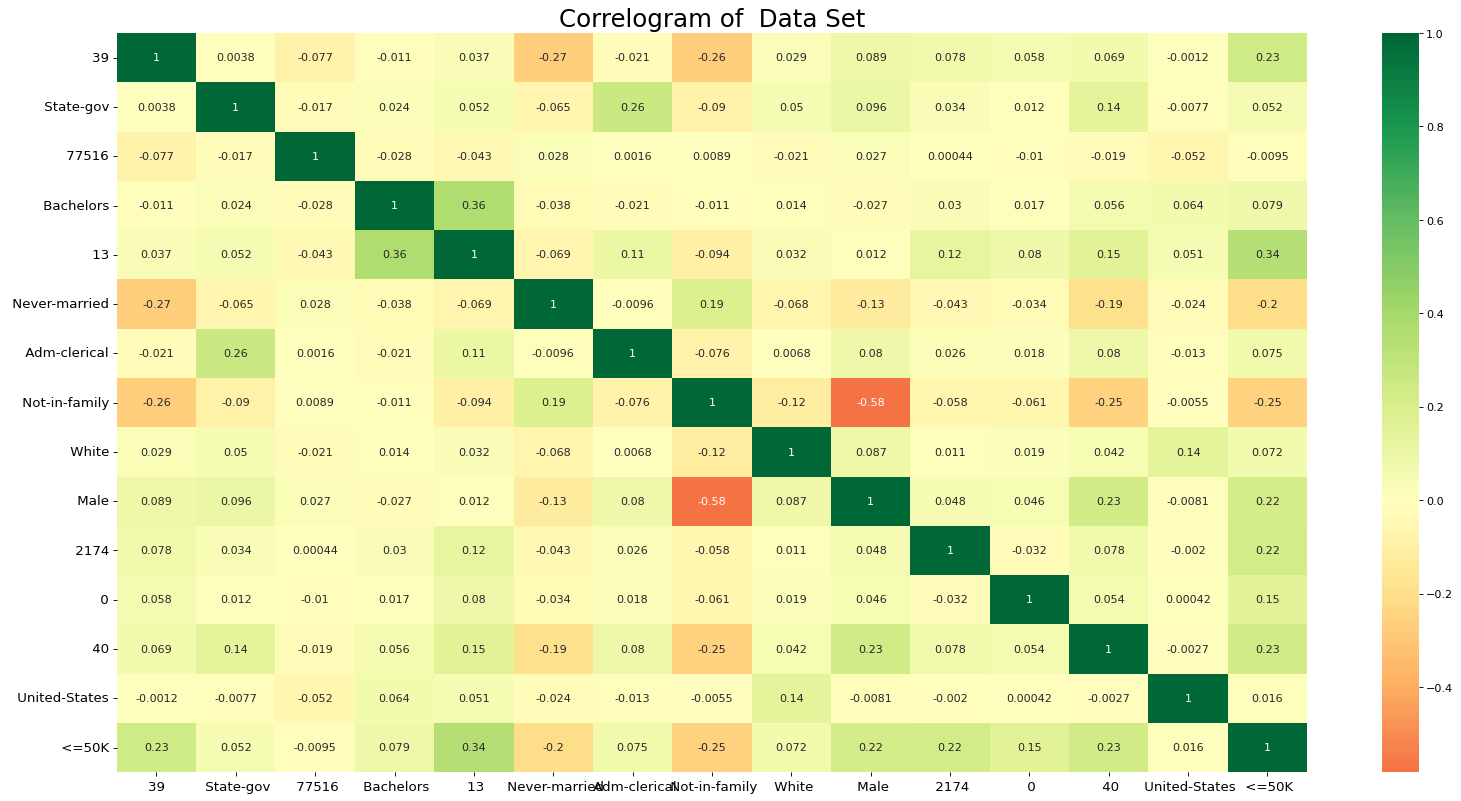

In [10]:
plot_corr(encoded_orig_data)

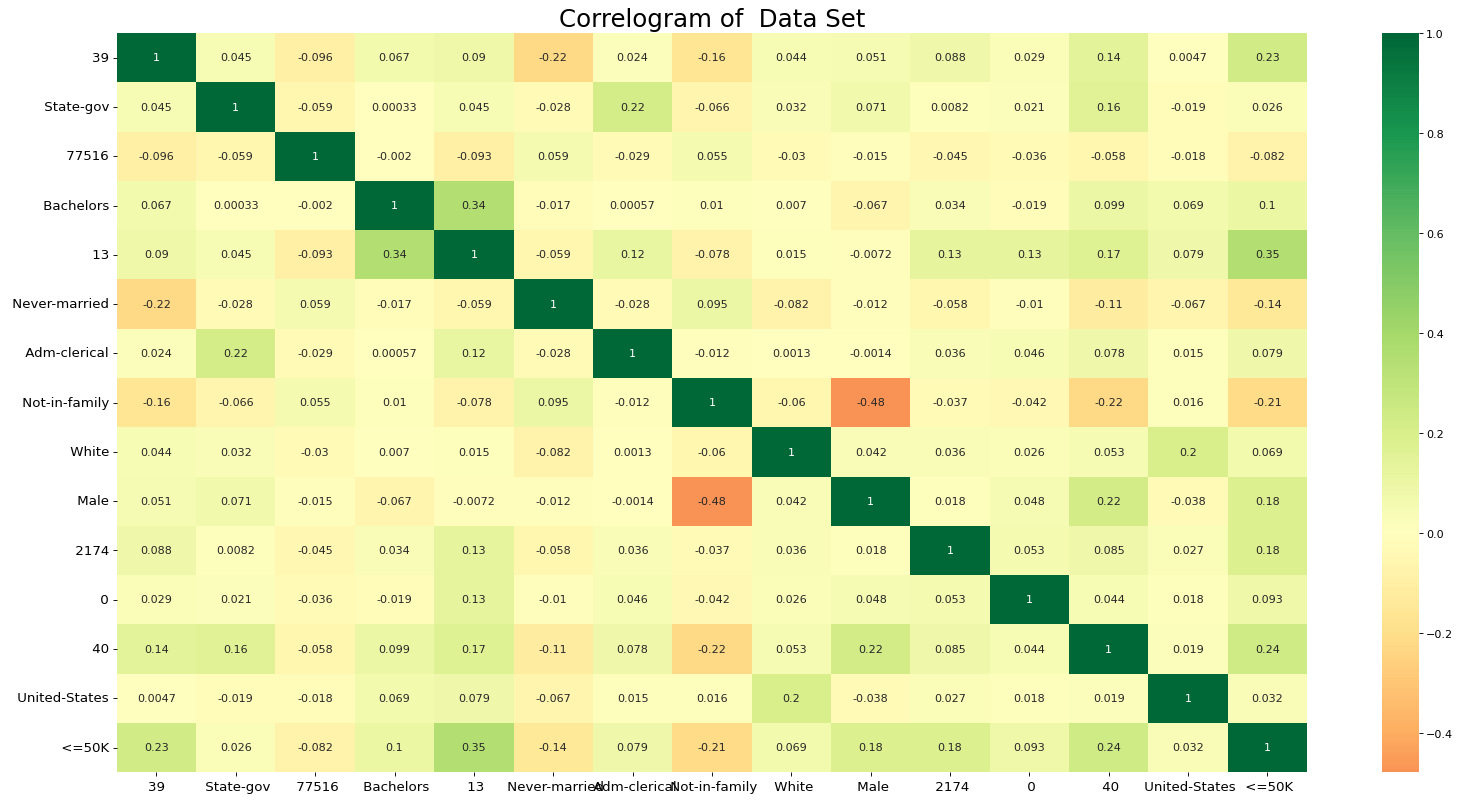

In [11]:
plot_corr(encoded_synt_data)

In [12]:
distance_beetween_two_matrix(encoded_orig_data, encoded_synt_data)

0.022930973937659426

In [13]:
r1, r2, r3, r4 = evaluate(encoded_orig_data, 'CTGAN', 32560, ' <=50K', categorical_cols)

In [14]:
r1.mean()

0.854987714987715

In [15]:
r2.mean()

0.7588452088452089

In [16]:
r3.mean()

0.8244471744471745

In [17]:
r4.mean()

0.8197788697788697